一次式における'LSTAT'の住宅価格への決定係数は0.43
二次式における'LSTAT'の住宅価格への決定係数は0.52
三次式における'LSTAT'の住宅価格への決定係数は0.54
四次式における'LSTAT'の住宅価格への決定係数は0.57


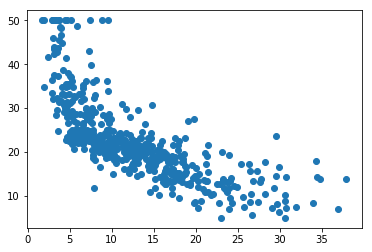

In [160]:
### 線形回帰とは何か
###回帰分析の一種で、複数の変数における相関関係を直線モデルによって説明しようとする分析手法。
#＃＃たとえば、不快日数の増加がエアコンの保持率をどれくらい増加させるか、年齢 1 歳の上昇は血圧を何 mmHg 上昇させるか、といった 2 次元データを整理要約して 1 次式が求まれば x から y が決定される様子やしくみを明らかにするのが線形回帰。
#＃＃入力数値から未来の数値を予測する点で、入力数値を元に新たに与えられたデータをグループに仕分けする分類とは異なる。

import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_boston
from scipy.stats import zscore
import pandas as pd
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error
%matplotlib inline

boston = load_boston()
X=pd.DataFrame(boston.data[:], columns=boston.feature_names)
y=boston.target[:]
x=X['LSTAT'].values
plt.scatter(x,y)

### 単回帰と重回帰についての違いを記述
#＃＃説明変数xが1つだけの回帰式を求めるのが単回帰分析、説明変数xが2つ以上ある回帰式を求めるのが重回帰分析

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)
lin_1d = LinearRegression()
#x = X.loc[:, ['LSTAT']].as_matrix()
lin_1d.fit(x_train[:,None], y_train)
score_1d = lin_1d.score(x_test[:,None],y_test)#[:,None]で問題ないか？
print("一次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_1d))

### 決定係数とは何か記述
#＃＃決定係数は、独立変数（説明変数）が従属変数（被説明変数）のどれくらいを説明できるかを表す値。
#＃＃もっとも説明変数が目的変数を説明できる場合の決定係数は１になる
#＃＃求め方は残差の二乗和を標本値の平均からの差の二乗和で割ったものを1から引いた値

### 決定係数をいかなる場合も信じても良いか記述
#＃＃決定係数はたまたま選ばれた標本への予測の当てはまりだけを見ている指標です。そのためこれを全体を対象とした決定係数と考えようとすると、予測の当てはまりの良さを過大に見積もっていることになる。また、ある変数の影響の有無が主眼であり予測は重視しない場合には、決定係数に注目することはあまり意味がないと言える。

### 2,3,4次式の回帰
### 次数が大きくなるとどうなるか記述
#＃＃一次式　ax + b,二次式　ax＊＊2 + bx + c,　三次式　ax**3 + bx**2 + cx + d
#＃＃次数を増やすメリットは、モデルの表現力が向上すること。デメリットは、過学習のリスクが上がる。

lin_2d = LinearRegression()
lin_3d = LinearRegression()
lin_4d = LinearRegression()

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(x_train[:,None])
x_train_3 = degree_3.fit_transform(x_train[:,None])
x_train_4 = degree_4.fit_transform(x_train[:,None])

lin_2d.fit(x_train_2, y_train)
lin_3d.fit(x_train_3, y_train)
lin_4d.fit(x_train_4, y_train)

x_test_2 = degree_2.fit_transform(x_test[:,None])
x_test_3 = degree_3.fit_transform(x_test[:,None])
x_test_4 = degree_4.fit_transform(x_test[:,None])

score_2d = lin_2d.score(x_test_2,y_test)
score_3d = lin_3d.score(x_test_3,y_test)
score_4d = lin_4d.score(x_test_4,y_test)

print("二次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_2d))
print("三次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_3d))
print("四次式における'LSTAT'の住宅価格への決定係数は%.2f"%(score_4d))


In [161]:
### 重回帰
### 重回帰について記述
#＃＃　説明変数を増やすメリットはモデルの表現力が上がること、デメリットは過学習・過剰適合のリスクが上がる。その他、連続値のデータには適するが、離散型のデータには適さない。

NX = pd.concat([X,pd.Series(y)],axis=1)
NX.corr()

x= X.loc[:, ['LSTAT','RM','TAX']].as_matrix()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

lin_1d_m = LinearRegression()
lin_1d_m.fit(x_train, y_train)

score_1d_m = lin_1d_m.score(x_test,y_test)
print("一次式における'LSTAT','RM','TAX'の住宅価格への決定係数は%.2f"%(score_1d_m))

lin_2d_m= LinearRegression()
lin_3d_m= LinearRegression()
lin_4d_m= LinearRegression()

degree_2 = PolynomialFeatures(degree=2)
degree_3 = PolynomialFeatures(degree=3)
degree_4 = PolynomialFeatures(degree=4)

x_train_2 = degree_2.fit_transform(x_train)
x_train_3 = degree_3.fit_transform(x_train)
x_train_4 = degree_4.fit_transform(x_train)

lin_2d_m.fit(x_train_2, y_train)
lin_3d_m.fit(x_train_3, y_train)
lin_4d_m.fit(x_train_4, y_train)

x_test_2 = degree_2.fit_transform(x_test)
x_test_3 = degree_3.fit_transform(x_test)
x_test_4 = degree_4.fit_transform(x_test)

score_2d_m = lin_2d_m.score(x_test_2,y_test)
score_3d_m = lin_3d_m.score(x_test_3,y_test)
score_4d_m = lin_4d_m.score(x_test_4,y_test)

print("二次式における'LSTAT','RM','TAX'の住宅価格への決定係数は%.2f"%(score_2d_m))
print("三次式における'LSTAT','RM','TAX'の住宅価格への決定係数は%.2f"%(score_3d_m))
print("四次式における'LSTAT','RM','TAX'の住宅価格への決定係数は%.2f"%(score_4d_m))

一次式における'LSTAT','RM','TAX'の住宅価格への決定係数は0.50
二次式における'LSTAT','RM','TAX'の住宅価格への決定係数は0.69
三次式における'LSTAT','RM','TAX'の住宅価格への決定係数は0.71
四次式における'LSTAT','RM','TAX'の住宅価格への決定係数は0.70


In [69]:
NX = pd.concat([X,pd.Series(y)],axis=1)
NX.corr()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,0
CRIM,1.000000,-0.199458,0.404471,-0.055295,0.417521,-0.219940,0.350784,-0.377904,0.622029,0.579564,0.288250,-0.377365,0.452220,-0.385832
ZN,-0.199458,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
INDUS,0.404471,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
CHAS,-0.055295,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
NOX,0.417521,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
RM,-0.219940,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
AGE,0.350784,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
DIS,-0.377904,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
RAD,0.622029,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
TAX,0.579564,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536
